In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
class Line:
    def __init__(self, xStart, xEnd, yStart, yEnd):
        self.xStart = round(xStart,5)
        self.xEnd = round(xEnd,5)
        self.yStart = round(yStart,5)
        self.yEnd = round(yEnd,5)
        xDiff=self.xEnd-self.xStart
        yDiff=self.yEnd-self.yStart

        if xDiff==0 or yDiff==0:
            self.type=1
        else:
            self.type=2
        self.length = np.sqrt(xDiff**2+yDiff**2)
        self.angle=math.atan2(yDiff,xDiff)

    def plot(self,totalGens,gen):
        x = np.array([self.xStart,self.xEnd])
        y = np.array([self.yStart,self.yEnd])
        xAvg=(self.xStart+self.xEnd)/2
        yAvg=(self.yStart+self.yEnd)/2
        plt.plot(x, y,marker=',',color=[round(abs(xAvg)/totalGens,1),round(abs(yAvg)/totalGens,1),gen/totalGens])
        
    def __str__(self):
        return f"({self.xStart},{self.yStart}) -> ({self.xEnd},{self.yEnd}),  Angle: {self.angle}"
        
    def createChildren(self,angle):
        xStart1=self.xEnd
        xEnd1=xStart1+self.length*round(math.cos(self.angle-angle),7)
        yStart1=self.yEnd
        yEnd1=yStart1+self.length*round(math.sin(self.angle-angle),7)
        child1=Line(xStart1, xEnd1, yStart1, yEnd1)
        
        xStart2=self.xEnd
        xEnd2=xStart2+self.length*round(math.cos(self.angle+angle),7)
        yStart2=self.yEnd
        yEnd2=yStart2+self.length*round(math.sin(self.angle+angle),7)
        child2=Line(xStart2, xEnd2, yStart2, yEnd2)
        
        
        return child1,child2

In [3]:
def find_intersection(line1, line2):
    x1=round(line1.xStart,3)
    y1=round(line1.yStart,3)
    x2=round(line1.xEnd,3)
    y2=round(line1.yEnd,3)
    x3=round(line2.xStart,3)
    y3=round(line2.yStart,3)
    x4=round(line2.xEnd,3)
    y4=round(line2.yEnd,3)

     # Calculate the slopes of the lines
    slope1 = (y2 - y1) / (x2 - x1) if x2 - x1 != 0 else float('inf')
    slope2 = (y4 - y3) / (x4 - x3) if x4 - x3 != 0 else float('inf')
    
    # Define a tolerance for comparing floating-point numbers
    tolerance = 1e-4
    
    # Check if the lines are parallel and share any points
    if abs(slope1 - slope2) < tolerance and (abs(x1 - x3) < tolerance and abs(y1 - y3) < tolerance or \
       abs(x1 - x4) < tolerance and abs(y1 - y4) < tolerance or \
       abs(x2 - x3) < tolerance and abs(y2 - y3) < tolerance or \
       abs(x2 - x4) < tolerance and abs(y2 - y4) < tolerance):
        return True
    
    # Check if the lines are parallel and overlapping
    if abs(slope1 - slope2) < tolerance and min(x1, x2) <= max(x3, x4) and min(x3, x4) <= max(x1, x2) and \
       min(y1, y2) <= max(y3, y4) and min(y3, y4) <= max(y1, y2):
        return True
    
    # Calculate the intersection point
    if slope1 == float('inf'):  # Line 1 is vertical
        x_intersection = x1
        y_intersection = slope2 * (x1 - x3) + y3
    elif slope2 == float('inf'):  # Line 2 is vertical
        x_intersection = x3
        y_intersection = slope1 * (x3 - x1) + y1
    else:
        x_intersection = (slope1 * x1 - slope2 * x3 + y3 - y1) / (slope1 - slope2)
        y_intersection = slope1 * (x_intersection - x1) + y1
    
    # Check if the intersection point lies within the line segments with tolerance
    if (min(x1, x2) - tolerance <= x_intersection <= max(x1, x2) + tolerance) and \
       (min(y1, y2) - tolerance <= y_intersection <= max(y1, y2) + tolerance) and \
       (min(x3, x4) - tolerance <= x_intersection <= max(x3, x4) + tolerance) and \
       (min(y3, y4) - tolerance <= y_intersection <= max(y3, y4) + tolerance):
        return True  # Lines intersect
    
    return False  # Lines don't intersect


In [4]:
def intersectsLineinArryCount(line,array):
    count =0
    for checkLine in array:
        if find_intersection(line,checkLine):
            count=count+1
    return count
def runSim(angle,gens):
    allLines=[Line(0,0,0,1)]
    currentLines=[Line(0,0,0,1)]
    childLines=[]
    preliminaryChildLines=[]


    for generation in range (0,gens):
        for line in currentLines:
            #print(line)
            line.plot(gens,generation)
            count=0
            child1,child2=line.createChildren(angle)
            preliminaryChildLines.append(child1)
            preliminaryChildLines.append(child2)

        for child in preliminaryChildLines:
            if intersectsLineinArryCount(child,allLines)<=1:
                if intersectsLineinArryCount(child,preliminaryChildLines)<=2:
                    childLines.append(child)

        allLines.extend(childLines)     
        currentLines=childLines
        childLines=[]
        preliminaryChildLines=[]
    for line in currentLines:
        line.plot(gens,generation)
    plt.show()

/var/folders/mm/n3m28g3d33q71h5q6rq9w3_r0000gn/T/ipykernel_26014/1339422554.py:33: RuntimeWarning: invalid value encountered in double_scalars
  y_intersection = slope2 * (x1 - x3) + y3
/var/folders/mm/n3m28g3d33q71h5q6rq9w3_r0000gn/T/ipykernel_26014/1339422554.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_intersection = (slope1 * x1 - slope2 * x3 + y3 - y1) / (slope1 - slope2)
/var/folders/mm/n3m28g3d33q71h5q6rq9w3_r0000gn/T/ipykernel_26014/1339422554.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_intersection = (slope1 * x1 - slope2 * x3 + y3 - y1) / (slope1 - slope2)
/var/folders/mm/n3m28g3d33q71h5q6rq9w3_r0000gn/T/ipykernel_26014/1339422554.py:39: RuntimeWarning: invalid value encountered in double_scalars
  y_intersection = slope1 * (x_intersection - x1) + y1


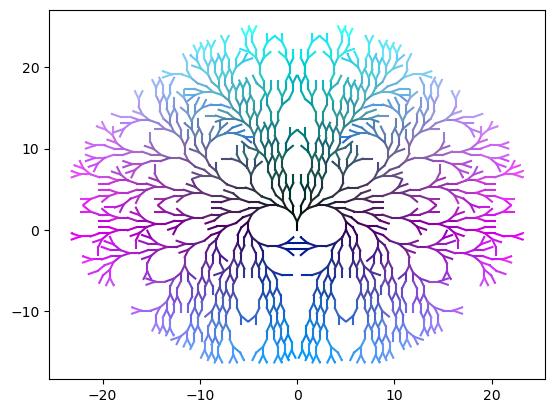

In [20]:
runSim(math.pi/8,25)

/var/folders/mm/n3m28g3d33q71h5q6rq9w3_r0000gn/T/ipykernel_26014/1339422554.py:33: RuntimeWarning: invalid value encountered in double_scalars
  y_intersection = slope2 * (x1 - x3) + y3
/var/folders/mm/n3m28g3d33q71h5q6rq9w3_r0000gn/T/ipykernel_26014/1339422554.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_intersection = (slope1 * x1 - slope2 * x3 + y3 - y1) / (slope1 - slope2)
/var/folders/mm/n3m28g3d33q71h5q6rq9w3_r0000gn/T/ipykernel_26014/1339422554.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_intersection = (slope1 * x1 - slope2 * x3 + y3 - y1) / (slope1 - slope2)
/var/folders/mm/n3m28g3d33q71h5q6rq9w3_r0000gn/T/ipykernel_26014/1339422554.py:39: RuntimeWarning: invalid value encountered in double_scalars
  y_intersection = slope1 * (x_intersection - x1) + y1


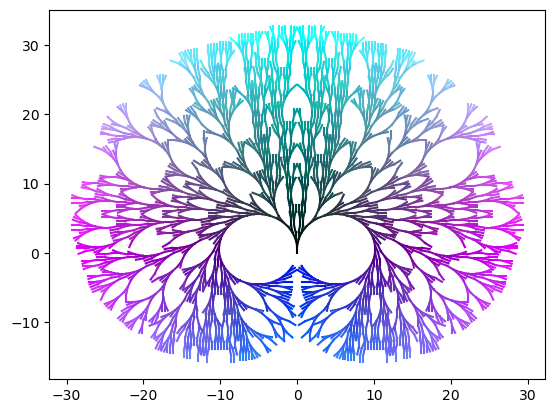

In [13]:
runSim(math.pi/16,32)

/var/folders/mm/n3m28g3d33q71h5q6rq9w3_r0000gn/T/ipykernel_26014/1339422554.py:33: RuntimeWarning: invalid value encountered in double_scalars
  y_intersection = slope2 * (x1 - x3) + y3
/var/folders/mm/n3m28g3d33q71h5q6rq9w3_r0000gn/T/ipykernel_26014/1339422554.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  x_intersection = (slope1 * x1 - slope2 * x3 + y3 - y1) / (slope1 - slope2)
/var/folders/mm/n3m28g3d33q71h5q6rq9w3_r0000gn/T/ipykernel_26014/1339422554.py:38: RuntimeWarning: invalid value encountered in double_scalars
  x_intersection = (slope1 * x1 - slope2 * x3 + y3 - y1) / (slope1 - slope2)
/var/folders/mm/n3m28g3d33q71h5q6rq9w3_r0000gn/T/ipykernel_26014/1339422554.py:39: RuntimeWarning: invalid value encountered in double_scalars
  y_intersection = slope1 * (x_intersection - x1) + y1


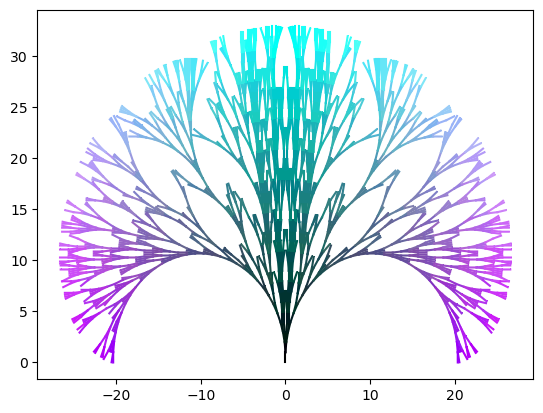

In [19]:
runSim(math.pi/32,32)